In [217]:
import polars as pl
import sklearn as sl
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist


In [218]:
df = pl.read_parquet("./sentiment.parquet")
df = df.to_pandas()
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df[df['date'] > '2005-11-01']
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\I569776\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [219]:
df.sort_values(by="date")

,abbreviation,date,firstName,lastName,speechContent,pos,neg,com
53648,SPD,2005-11-08,rainer,arnold,"Herr Kollege Schäfer, ich kann es sehr kurz ma...",0.2086,0.0167,0.1919
123337,SPD,2005-11-08,rainer,arnold,Herr Präsident! Werte Kolleginnen und Kollegen...,4.6247,3.5789,1.0458
97815,CDU/CSU,2005-11-08,bernd,schmidbauer,Herr Präsident! Meine sehr verehrten Kolleginn...,0.7933,0.6621,0.1312
4114,CDU/CSU,2005-11-08,christian,schmidt,Herr Präsident! Meine sehr verehrten Kolleginn...,0.8084,0.0341,0.7743
114681,SPD,2005-11-08,gert,weisskirchen,Herr Präsident! Meine sehr verehrten Damen und...,0.9982,0.0000,0.9982
...,...,...,...,...,...,...,...,...
6438,CDU/CSU,2025-02-11,Thorsten,Frei,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,0.8210,1.2950,-0.4740
40078,Fraktionslos,2025-02-11,Thomas,Seitz,Sehr geehrte Frau Präsidentin! Meine Damen und...,0.1171,2.4588,-2.3417
63385,CDU/CSU,2025-02-11,Friedrich,Merz,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,2.0162,2.0459,-0.0297
131502,FDP,2025-02-11,Christian,Lindner,Frau Präsidentin! Liebe Kolleginnen! Liebe Kol...,1.6092,2.6432,-1.0340


In [220]:
df = df.sort_values(by = "date", ignore_index=True)

In [221]:
additional_filter = ['damen',
 'damen herren',
 'frage',
 'haben',
 'hat',
 'herr',
 'herren',
 'heute',
 'ist',
 'ja',
 'mehr',
 'müssen',
 'sagen',
 'schon',
 'sind',
 'werden',
 'wird',
 'aber',
 'alle',
 'als',
 'also',
 'am',
 'an',
 'anderen',
 'auch',
 'auch die',
 'auf',
 'auf die',
 'aus',
 'bei',
 'bei der',
 'bis',
 'da',
 'dafür',
 'damit',
 'dank',
 'dann',
 'darauf',
 'darüber',
 'das',
 'dass',
 'dazu',
 'daß',
 'daß die',
 'dem',
 'den',
 'denn',
 'der',
 'des',
 'deshalb',
 'die',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einmal',
 'er',
 'es',
 'etwas',
 'für',
 'für die',
 'ganz',
 'geht',
 'gerade',
 'gesagt',
 'gibt',
 'habe',
 'haben',
 'hat',
 'herren',
 'hier',
 'ich',
 'ihnen',
 'ihre',
 'ihrer',
 'im',
 'immer',
 'in',
 'in den',
 'in der',
 'in die',
 'in diesem',
 'ist',
 'jahren',
 'jetzt',
 'kann',
 'keine',
 'kollege',
 'kollegen',
 'können',
 'lassen',
 'machen',
 'man',
 'meine',
 'meine und',
 'meine und herren',
 'menschen',
 'mich',
 'mir',
 'mit',
 'mit dem',
 'mit der',
 'möchte',
 'nach',
 'nicht',
 'nicht nur',
 'noch',
 'nur',
 'ob',
 'oder',
 'sagen',
 'sehr',
 'sein',
 'sich',
 'sie',
 'sind',
 'so',
 'sondern',
 'um',
 'und',
 'und der',
 'und die',
 'und herren',
 'uns',
 'unsere',
 'unter',
 'vielen',
 'vom',
 'von',
 'von der',
 'vor',
 'war',
 'was',
 'weil',
 'wenn',
 'werden',
 'wie',
 'wieder',
 'will',
 'wir',
 'wir uns',
 'wird',
 'wollen',
 'worden',
 'wurde',
 'wäre',
 'zu',
 'zum',
 'zur',
 'über',
 'über die',
 'allem',
 'allen',
 'aller',
 'allerdings',
 'alles',
 'an',
 'andere',
 'antrag',
 'auch',
 'aus',
 'beim',
 'beispiel',
 'bereich',
 'bereits',
 'besonders',
 'bin',
 'bisher',
 'bitte',
 'brauchen',
 'bringen',
 'darf',
 'darum',
 'das',
 'davon',
  'gar',
 'geben',
 'gegeben',
 'gegen',
 'gegenüber',
 'gehen',
 'gehört',
 'gemacht',
 'genau',
 'gesagt',
 'ich',
 'ihr',
 'ihrem',
 'ihren',
 'insbesondere',
 'ist',
 'ja',
 'kommen',
 'kommt',
 'können',
 'könnte',
 'muss',
 'muß',
 'möglich',
 'müssen',
 'natürlich',
 'nehmen',
 'neue',
 'neuen',
 'nicht',
 'nichts',
 'notwendig',
 'nun',
 'nämlich',
 'ohne',

 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '20',
 '30',
 '50',
 'ab',
 'aber',
 'all',
 'allein',
 'an',
 'anderer',
 'anderes',
 'anders',
 'anfang',
 'angesichts',
 'angesprochen',
 'arbeiten',
 'art',
 'auch',
 'auf',
 'auffassung',
 'aufgabe',
 'aus',
 'ausdrücklich',
 'bedeutet',
 'bedeutung',
 'beiden',
 'beispielsweise',
 'bekannt',
 'bekommen',
 'bereit',
 'besser',
 'besteht',
 'bleiben',
 'bleibt',
 'blick',
 'braucht',
 'bringen',
 'daher',
 'damals',
 'dank',
 'danke',
 'daran',
 'daraus',
 'darin',
 'darum',
 'das',
 'dazu',
 'debatte',
 'denen',
 'denke',
 'denken',
 'deren',
 'dessen',
 'deswegen',
 'herzlichen',
  'hin',
  'hören',
  'ihm',
  'ihn',
  'ihres',
  'indem',
  'ins',
  'insgesamt',
  'ist',
  'jede',
  'jeden',
  'jeder',
  'jedoch',
  'keinen',

  'völlig',
  'weder',
  'wegen',
  'weise',
  'weit',
  'weitere',
  'weiteren',
  'weiterhin',
  'welche',
  'wenig',
  'weniger',
  'werde',
  'wichtige',

  'erst',
  'erste',
  'ersten',
  'erstens',
  'etwa',

  'fest',
  'feststellen',
  'finde',
  'finden',
  'folgen',

  'gab',
  'ganze',
  'ganzen',
  'gebracht',
  'geehrte',
  'gefordert',
  'geführt',
  'gegenteil',
  'gekommen',

'wo',
  'woche',
  'wochen',
  'wohl',
  'wollte',
  'wort',
  'wurden',
  'während',
  'wären',
  'würde',
  'würden',
  'zahl',
  'zahlen',
  'zeigen',
  'zeigt',
  'zeit',
  'ziel',
  'zwar',
  'zwei',
  'zweite',
  'zweiten',
  'zweitens',
  'zwischen',
  'öffentlichen',
  'öffentlichkeit',
  'überhaupt',
  'übrigen',
  'übrigens',

  '000 dm',
  '000 euro',
  '100 000',
  '100 millionen',
  '100 prozent',
  '120',
  '14',
  '15',
  '150',
  '16',
  '17',
  '18',
  '19',
  '1950',
  '1957',
  '1965',
  '1966',
  '1968',
  '1969',
  '1970',
  '1971',
  '1972',
  '1973',
  '1974',
  '1975',
  '1976',
  '1977',
  '1978',
  '1979',
  '1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '20',
  '200',
  '200 000',
  '200 millionen',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022',
  '2023',
  '2030',
  '21',
  '22',
  '23',
  '24',
  '25',
  '25 prozent',
  '250',
  '26',
  '27',
  '28',
  '29',
  '30',
  '300',
  '300 000',
  '31',
  '31 dezember',
  '32',
  '33',
  '34',
  '35',
  '350',
  '36',
  '37',
  '38',
  '39',
  '40',
  '40 prozent',
  '400',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '500',
  '500 000',
  '500 millionen',
  '51',
  '52',
  '53',
  '55',
  '60',
  '60 prozent',
  '600',
  '65',
  '67',
  '70',
  '70 prozent',
  '700',
  '70er',
  '75',
  '80',
  '80 prozent',
  '800',
  '80er',
  '85',
  '90',
  'ach',
  'acht',
  'achten',
  'achtung',


  '130',
  '140',
  '16',
  '17',
  '18',
  '180',
  '19',
  '1989',
  '20',
  '2025',
  '2050',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '30',
  '63',
  '750',
  '90',
  '900',
  '90er',
  '95',
  'abend',
  'abgabe',
  'abgaben',
  'abgebaut',
  'abgeben',
  'abgegeben',
  'abgeordnete',
  'abgeordneten',
  'abgeordneter',
  'abgeschlossen',
  'abgesehen',
  'abgesichert',
  'abgestimmt',
  'ablauf',
  'ablehnen',
  'ablehnung',
  'abs',
  'absatz',
  'abschließen',
  'abschließend',
  'abschluss',
  'absehbar',
  'absicherung',
  'absicht',
  'absolut',
  'absolute',
  'abstand',
  'abstimmen',
  'abstimmung',
  'absurd',
  'abwarten',
  'abwägung',
  'abzubauen',
  'abzug',
  'abzulehnen',
  'abzuschaffen',
  'adresse',
  'ag',
  'agenda',
  'agieren',
  'agiert',
  'ahnung',
  'akteure',
  'akteuren',
  'aktion',
  'aktionen',
  'aktiv',
  'aktive',
  'aktiven',
  'aktivitäten',
  'aktuell',
  'aktuelle',
  'aktuelle stunde',
  'aktuellen',
  'aktuellen stunde',
  'akzente',
  'akzeptabel',
  'akzeptieren',
  'akzeptiert',
  'al',
  'alg',
  'alleine',
  'allenfalls',
  'allermeisten',
  'allgemein',
  'allgemeine',
  'allgemeinen',
  'alltag',
  'allzu',
  'alt',
  'alte',
  'alter',
  'amt',
  'amtes',
  'analyse',
  'anbelangt',
  'anbetracht',
  'anbieten',
  'anbieter',
  'and',
  'andererseits',
  'anderswo',
  'anderthalb',
  'anerkannt',
  'anerkennen',
  'anerkennung',
  'anfangen',
  'anforderungen',
  'anfragen',
  'anführen',
  'angaben',
  'angeblich',
  'angebot',
  'angebote',
  'angeboten',
  'angebracht',
  'angedeutet',
  'angefangen',
  'angeführt',
  'angegangen',
  'angegriffen',
  'angehen',
  'angehoben',
  'angeht',
  'angehören',
  'angehört',
  'angekommen',
  'angekündigt',
  'angelegt',
  'angemahnt',
  'angemessene',
  'angemessenen',
  'angenommen',
  'angepasst',
  'angerechnet',
  'angeschaut',
  'angesehen',
  'angesetzt',
  'angesiedelt',
  'angesprochenen',
  'angestoßen',
  'angewandt',
  'angewendet',
  'angewiesen',
  'angleichung',
  'anhand',
  'anhebung',
  'anhörung',
  'anhörungen',
  'ankommen',
  'ankommt',
  'ankündigung',
  'ankündigungen',
  'anlage',
  'anlagen',
  'anlass',
  'anliegen',
  'anlässlich',
  'anmerkung',
  'anmerkungen',
  'annahme',
  'annehmen',
  'anpacken',
  'anpassen',
  'anpassung',
  'anpassungen',
  'anregungen',
  'ans',
  'anschaue',
  'anschauen',
  'anschaut',
  'anscheinend',
  'anschließen',
  'anschließend',
  'anschluss',
  'ansehen',
  'ansetzen',
  'ansicht',
  'ansieht',
  'ansonsten',
  'ansprechen',
  'anspruch genommen',
  'anstatt',
  'anstehenden',
  'anstieg',
  'anstreben',
  'anstrengungen',
  'ansätze',
  'antrag',
  'antrages',
  'antrags',
  'antragsteller',
  'anträgen',
  'antwort bundesregierung',
  'antworten',
  'anwenden',
  'anwendung',
  'anwesend',
  'anzahl',
  'anzubieten',
  'anzuerkennen',
  'anzugehen',
  'anzunehmen',
  'anzupassen',
  'appell',
  'appelliere',
  'appellieren',
  'april',
  'arbeitnehmer',
  'argument',
  'argumentation',
  'argumente',
  'argumenten',
  'argumentieren',
  'argumentiert',
  'armutszeugnis',
  'artikel',
  'aspekt',
  'aspekte',
  'attraktiv',
  'attraktiver',
  'attraktivität',
  'aufarbeitung',
  'aufbau',
  'aufbauen',
  'aufbringen',
  'aufeinander',
  'auffordern',
  'aufforderung',
  'aufgaben',
  'aufgebaut',
  'aufgeben',
  'aufgefallen',
  'aufgefordert',
  'aufgeführt',
  'aufgegeben',
  'aufgegriffen',
  'aufgehoben',
  'aufgeklärt',
  'aufgelegt',
  'aufgenommen',
  'aufgerufen',
  'aufgestellt',
  'aufgestockt',
  'aufgezeigt',
  'aufgreifen',
  'aufhalten',
  'aufhebung',
  'aufhören',
  'aufklären',
  'aufklärung',
  'aufkommen',
  'auflagen',
  'aufmerksam',
  'aufnahme',
  'aufnehmen',
  'aufpassen',
  'aufrechterhalten',
  'aufs',
  'aufsicht',
  'aufstellen',
  'aufstockung',
  'auftrag',
  'auftreten',
  'aufträge',
  'aufwand',
  'aufwuchs',
  'aufzeigen',
  'aufzubauen',
  'aufzuklären',
  'aufzunehmen',
  'auge',
  'augen',
  'augen führen',
  'augenblick',
  'augenhöhe',
  'augenmaß',
  'augenmerk',
  'august',
  'aus',
  'ausdruck',
  'auseinander',
  'ausführen',
  'ausführlich',
  'ausführungen',
  'ausgebaut',
  'ausgeben',
  'ausgebildet',
  'ausgebildete',
  'ausgedrückt',
  'ausgeführt',
  'ausgegangen',
  'ausgegeben',
  'ausgeglichen',
  'ausgehen',
  'ausgeht',
  'ausgelöst',
  'ausgenommen',
  'ausgerechnet',
  'ausgerichtet',
  'ausgeschlossen',
  'ausgesetzt',
  'ausgesprochen',
  'ausgestaltet',
  'ausgestaltung',
  'ausgeweitet',
  'ausgleich',
  'auskunft',
  'ausmacht',
  'ausmaß',
  'ausnahme',
  'ausnahmen',
  'ausreichen',
  'ausreichend',
  'ausreichende',
  'ausreicht',
  'ausrichten',
  'ausrichtung',
  'ausrüstung',
  'aussage',
  'aussagen',
  'ausschließen',
  'ausschließlich',
  'ausschusses',
  'ausschüssen',
  'aussehen',
  'aussicht',
  'aussieht',
  'aussprechen',
  'ausstattung',
  'ausstieg',
  'austausch',
  'ausweiten',
  'ausweitung',
  'auswirken',
  'auszugeben',
  'auszuschließen',
  'ausüben',
  'auto',
  'automatisch',
  'außer',
  'außerhalb',
  'außerordentlich',
  'balance',
  'bald',
  'basiert',
  'basis',
  'beachten',
  'beachtet',
  'beachtung',
  'beantragen',
  'beantragt',
  'beantworten',
  'beantwortet',
  'beantwortung',
  'beck',
  'bedanke aufmerksamkeit',
  'bedanken',
  'bedarf',
  'bedauerlich',
  'bedauern',
  'bedenken',
  'bedenklich',
  'bedeuten',
  'bedienen',
  'bedingt',
  'bedingungen',
  'bedroht',
  'bedrohung',
  'bedürfen',
  'bedürfnisse',
  'bedürfnissen',
  'beeinflussen',
  'beenden',
  'beendet',
  'beendigung',
  'befassen',
  'befasst',
  'befinden',
  'befindet',
  'befürchten',
  'begangen',
  'begeben',
  'begegnen',
  'begehen',
  'beginn',
  'beginnen',
  'beginnt',
  'begleiten',
  'begleitet',
  'begleitung',
  'begonnen',
  'begreifen',
  'begrenzen',
  'begrenzt',
  'begrenzung',
  'begriff',
  'begriffe',
  'begriffen',
  'begründen',
  'begründet',
  'begründung',
  'begrüße',
  'begrüßen',
  'begrüßt',
  'behalten',
  'behandeln',
  'behandelt',
  'behandlung',
  'behaupten',
  'behauptet',
  'behauptung',
  'beheben',
  'beibehalten',
  'beide',
  'beides',
  'beifall',
  'beigetragen',
  'beinhaltet',
  'beirat',
  'beispiele',
  'beispiele nennen',
  'beispielen',
  'beispielhaft',
  'beitrag leisten',
  'beitragen',
  'beiträgen',
  'beiträgt',
  'beizutragen',
  'bekannten',
  'bekanntlich',
  'bekennen',
  'bekenntnis',
  'beklagen',
  'beklagt',
  'bekommt',
  'bekämpfen',
  'bekämpft',
  'belange',
  'belassen',
  'belasten',
  'beleg',
  'belegen',
  'belegt',
  'bemerkenswert',
  'bemerkung',
  'bemerkungen',
  'bemühen',
  'bemüht',
  'bemühungen',
  'benachteiligt',
  'benannt',
  'benennen',
  'benutzen',
  'benutzt',
  'benötigen',
  'benötigt',
  'beobachten',
  'beratung',
  'beratungen',
  'berechnung',
  'berechnungen',
  'berechtigt',
  'berechtigte',
  'berechtigten',
  'bereiche',
  'bereitet',
  'bereitgestellt',
  'bereitschaft',
  'bereitstellen',
  'bereitstellung',
  'berichten',
  'berichterstatter',
  'berichterstattung',
  'berichtet',
  'berichts',
  'beruf',
  'berufe',
  'berufen',
  'berufliche',
  'beruflichen',
  'beruht',
  'berücksichtigen',
  'berücksichtigt',
  'berücksichtigung',
  'berührt',
  'besagt',
  'beschlossenen',
  'beschreiben',
  'beschreibt',
  'beschreiten',
  'beschrieben',
  'beschränken',
  'beschränkt',
  'beschämend',
  'beseitigen',
  'beseitigt',
  'beseitigung',
  'besetzt',
  'besitzen',
  'besondere',
  'besonderen',
  'besonderer',
  'besonderes',
  'besprechen',
  'besprochen',
  'besseren',
  'besseres',
  'bestand',
  'bestandteil',
  'beste',
  'bestehen',
  'bestehende',
  'bestehenden',
  'bestellt',
  'besten',
  'besteuerung',
  'bestimmen',
  'bestimmt',
  'bestimmte',
  'bestimmten',
  'bestimmter',
  'bestimmungen',
  'bestraft',
  'bestreiten',
  'bestätigen',
  'bestätigt',
  'besuch',
  'besuchen',
  'besucht',
  'beteiligen',
  'beteiligt',
  'beteiligten',
  'beteiligung',
  'betone',
  'betonen',
  'betont',
  'betrachten',
  'betrachtet',
  'betrachtung',
  'betrag',
  'betragen',
  'betreffen',
  'betreffenden',
  'betreiben',
  'betreiber',
  'betreibt',
  'betrieb',
  'betriebe',
  'betrieben',
  'betriebliche',
  'betrieblichen',
  'betroffen',
  'betroffene',
  'betrug',
  'beurteilen',
  'bevor',
  'bewahren',
  'bewegen',
  'bewegt',
  'bewegung',
  'beweis',
  'beweisen',
  'bewerten',
  'bewertet',
  'bewertung',
  'bewiesen',
  'bewirken',
  'bewirkt',
  'bewusst',
  'bewusstsein',
  'bewährt',
  'bewältigen',
  'bewältigung',
  'bezeichnen',
  'bezeichnet',
  'beziehen',
  'bezieher',
  'bezieht',
  'bezogen',
  'bezüglich',
  'bieten',
  'bietet',
  'bilanz',
  'bild',
  'bilden',
  'bilder',
  'birgt',
  'bisherige',
  'bisherigen',
  'bislang',
  'bitten',
  'bitter',
  'bka',
  'bleibe',
  'blicken',
  'bloß',
  'bmz',
  'boden',
  'boot',
  'botschaft',
  'brauche',
  'brechen',
  'breit',
  'breite',
  'breiten',
  'breiter',
  'brexit',
  'brief',
  'bringt',
  'bräuchten',
  'brüderle',
  'buch',
  'chaos',
  'charakter',
  'charta',
  'chef',
  'circa',
  'dach',
  'dachte',
  'dahin',
  'dahin gehend',
  'dahinter',
  'damalige',
  'damaligen',
  'danach',
  'daneben',
  'dankbar',
  'danken',
  'dankeschön',
  'dar',
  'daraufhin',
  'dargelegt',
  'dargestellt',
  'darstellen',
  'darstellt',
  'darstellung',
  'darunter',
  'darzustellen',
  'das',
  'dasselbe',
  'dauer',
  'dauerhaft',
  'dauerhafte',
  'dauerhaften',
  'dauern',
  'dauert',
  'davor',
  'de facto',
  'deal',
  'debatten',
  'debattieren',
  'debattiert',
  'decken',
  'definieren',
  'definiert',
  'definition',
  'definitiv',
  'dementsprechend',
  'demnach',
  'demnächst',
  'denjenigen',
  'denkbar',
  'denkt',
  'dennoch',
  'der',
  'derart',
  'derartige',
  'derer',
  'derjenige',
  'derjenigen',
  'derselben',
  'derzeitige',
  'derzeitigen',
  'desto',
  'detail',
  'details',
  'deutlich geworden',
  'deutliche',
  'deutlichen',
  'deutlicher',
  'deutliches',
  'deutlichkeit',
  'dezember',
  'dialog',
  'die',
  'dienen',
  'dienst',
  'dienstag',
  'diesbezüglich',
  'dieselbe',
  'diesmal',
  'differenziert',
  'dimension',
  'dir',
  'direkt',
  'direkte',
  'direkten',
  'diskussionen',
  'dokumentiert',
  'doppelt',
  'doppelte',
  'dorthin',
  'dortigen',
  'dr',
  'dramatisch',
  'dramatische',
  'dramatischen',
  'dran',

  'gegangen',
  'gegebene',
  'gegebene reden',
  'gegensatz',
  'gehabt',
  'gehalten',
  'gehe',
  'gehören',
  'gelegt',
  'geleistet',
  'gelesen',
  'gelingen',
  'gelingt',
  'gelten',
  'gelungen',
  'genannten',

  'dritte',
  'drittel',
  'dritten',
  'drittens',
  'druck',
  'du',

  'gegangen',
  'gegebene',
  'gegebene reden',
  'gegensatz',
  'gehabt',
  'gehalten',
  'gehe',
  'gehören',
  'gelegt',
  'geleistet',
  'gelesen',
  'gelingen',
  'gelingt',
  'gelten',
  'gelungen',
  'genannten',

  'herzlich',
  'heutigen',
  'hierfür',
  'hierzu',
  'hilft',
  'hinblick',
  'hinsichtlich',
  'hinter',
  'hinweg',
  'hinweis',
  'hinweisen',
  'hinzu',
  'hoch',

  'hohe',
  'hälfte',
  'hält',
  'häufig',
  'höher',
  'höhere',
  'höheren',
  'idee',
  'ideen',
  'ii',
  'immerhin',

  '000 000',
  '000 euro',
  '100 000',
  '100 euro',
  '100 milliarden',
  '100 milliarden euro',
  '100 millionen',
  '100 millionen euro',
  '100 prozent',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '40',
  '64',
  '70er',
  '90er',
 ]

In [222]:
set(stopwords.words('german'))

{'aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'das',
 'dass',
 'dasselbe',
 'dazu',
 'daß',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'dem',
 'demselben',
 'den',
 'denn',
 'denselben',
 'der',
 'derer',
 'derselbe',
 'derselben',
 'des',
 'desselben',
 'dessen',
 'dich',
 'die',
 'dies',
 'diese',
 'dieselbe',
 'dieselben',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'dir',
 'doch',
 'dort',
 'du',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'es',
 'etwas',
 'euch',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 'hier',


In [223]:
def remove_stopwords(text):
    if text is None:
        return None
    # Get German stopwords
    stop_words = set(stopwords.words('german'))

    text = text.replace(".", " ").replace(":", " ").replace(",", " ").replace("!", " ").replace(r"?", " ").replace("\"", " ").replace("(", " ").replace(")", " ").replace(";", " ").replace(" - ", " ").replace("{", " ").replace("}"," ")

    # Tokenize the text (splitting into words)
    words = text.split()

    # Filter out stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words = [word for word in filtered_words if word.lower() not in additional_filter]

    # Join the words back into a string
    return ' '.join(filtered_words)

# Example usage
text = "Dies ist ein Beispieltext, der einige {23} häufige Wörter enthält.:"
print(remove_stopwords(text))
print(remove_stopwords(None))

Beispieltext häufige Wörter enthält
None


In [224]:
#cleared_texts = df["speechContent"].apply(lambda text: remove_stopwords(text))

In [225]:
#cleared_texts.iloc[0]

In [226]:
#cleared_texts = cleared_texts.dropna()

In [227]:
'''model = sl.feature_extraction.text.TfidfVectorizer(

    input = 'content',
    ngram_range=(1,3),
    max_df=0.05,
    min_df=0.005,
    sublinear_tf=True

)

matrix = model.fit_transform(cleared_texts)'''

"model = sl.feature_extraction.text.TfidfVectorizer(\n\n    input = 'content',\n    ngram_range=(1,3),\n    max_df=0.05,\n    min_df=0.005,\n    sublinear_tf=True\n\n)\n\nmatrix = model.fit_transform(cleared_texts)"

# Split topics by legislaturperioden

In [228]:
import pandas as pd


# Define the time periods
periods = {
"2005-2009": ('2005-01-01', '2009-12-31'),
"2009-2013": ('2009-01-01', '2013-12-31'),
"2013-2017": ('2013-01-01', '2017-12-31'),
"2017-2021": ('2017-01-01', '2021-12-31'),
"2021-2025": ('2021-01-01', '2025-12-31')
}

# Create filtered DataFrames for each period
dfs = {}
for period, (start_date, end_date) in periods.items():
    dfs[period] = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)]

dfs["2017-2021"]

,abbreviation,date,firstName,lastName,speechContent,pos,neg,com
73006,Grüne,2017-01-18,Matthias,Gastel,"Herr Staatssekretär, ich habe direkt zu Ihrer ...",0.5681,0.0384,0.5297
73007,Grüne,2017-01-18,Stephan,Kühn,"\nVielen Dank, Herr Präsident . - Herr Ministe...",0.0040,0.0000,0.0040
73008,CDU/CSU,2017-01-18,Claudia,Lücking-Michel,"Herr Minister, vielen Dank . - Meine Frage bez...",0.3233,0.0000,0.3233
73009,Grüne,2017-01-18,Volker,Beck,Seit heute ermittelt ja endlich der Generalbun...,0.0040,0.0000,0.0040
73010,DIE LINKE.,2017-01-18,Heike,Hänsel,"Danke schön . - Herr Staatssekretär, auch ich ...",0.0040,0.0000,0.0040
...,...,...,...,...,...,...,...,...
110811,AfD,2021-12-16,Stephan,Brandner,\n\t\t\t\t\tMeine Damen und Herren! Frau Präsi...,0.1211,1.4074,-1.2863
110812,Grüne,2021-12-16,Katharina,Beck,\n\t\t\t\t\tSehr geehrte Frau Präsidentin! Lie...,2.0288,1.4074,0.6214
110813,Grüne,2021-12-16,Irene,Mihalic,\n\t\t\t\t\tSehr geehrte Frau Präsidentin! Lie...,0.1251,1.6196,-1.4945
110814,CDU/CSU,2021-12-16,Patrick,Schnieder,\n\t\t\t\t\tFrau Präsidentin! Werte Kolleginne...,1.4366,0.0048,1.4318


In [229]:
cleared_texts_2005_ff = dfs["2005-2009"]["speechContent"].apply(lambda text: remove_stopwords(text))
cleared_texts_2009_ff = dfs["2009-2013"]["speechContent"].apply(lambda text: remove_stopwords(text))
cleared_texts_2013_ff = dfs["2013-2017"]["speechContent"].apply(lambda text: remove_stopwords(text))
cleared_texts_2017_ff = dfs["2017-2021"]["speechContent"].apply(lambda text: remove_stopwords(text))
cleared_texts_2021_ff = dfs["2021-2025"]["speechContent"].apply(lambda text: remove_stopwords(text))

cleared_texts_2005_ff = cleared_texts_2005_ff.dropna()
cleared_texts_2009_ff = cleared_texts_2009_ff.dropna()
cleared_texts_2013_ff = cleared_texts_2013_ff.dropna()
cleared_texts_2017_ff = cleared_texts_2017_ff.dropna()
cleared_texts_2021_ff = cleared_texts_2021_ff.dropna()

cleared_texts_array = [cleared_texts_2005_ff, cleared_texts_2009_ff, cleared_texts_2013_ff, cleared_texts_2017_ff, cleared_texts_2021_ff]

In [230]:
model = sl.feature_extraction.text.TfidfVectorizer(

    input = 'content',
    ngram_range=(1,3),
    max_df=0.05,
    min_df=0.0025,
    sublinear_tf=True

)

In [231]:
class HashableList(tuple):
    def new(cls, iterable):
        # We assume that every element is a string
        return super(HashableList, cls).new(cls, iterable)

    def str(self):
        return list.str(self)

# Usage:
hl = HashableList(["a", "b", "c"])
print(hl)
print(hash(hl))

('a', 'b', 'c')
-663732003771562960


In [232]:
def run_model_and_cluster(cleared_texts, random, num_clusters):

    matrix = model.fit_transform(cleared_texts)
    tfidf_df = pd.DataFrame(matrix.toarray(), columns=model.get_feature_names_out())
    
    # Convert the sparse matrix to a dense array for clustering
    dense_matrix = matrix.toarray()

    # Transpose the matrix to cluster columns (terms)
    dense_matrix_t = dense_matrix.T

    # Apply K-means clustering to the columns
    kmeans = KMeans(n_clusters=num_clusters, random_state=random)
    kmeans.fit(dense_matrix_t)



    # Get the cluster labels
    clusters = kmeans.labels_

    num_clusters = len(kmeans.cluster_centers_)
    clusters = [[] for _ in range(num_clusters)]

    for c in tfidf_df.columns:
        # Get the TF-IDF vector for the current column
        vector = tfidf_df[c].to_numpy().reshape(1, -1)

        # Compute Euclidean distances from the vector to all cluster centers
        distances = cdist(vector, kmeans.cluster_centers_, 'euclidean')

        # Find the index of the smallest distance
        index = np.argmin(distances)

        # Append the column to the corresponding cluster
        clusters[index].append(c)

    return [HashableList(c) for c in clusters]

In [233]:
'''
for ct in cleared_texts_array:
    clusters = set([])
    for n_clust in [20, 50]:
        for random in [42, 101, 123, 815]:
            clusters = clusters.union(set(run_model_and_cluster(ct, random, n_clust)))

cluster_list = [c for c in clusters if len(c) > 1 and len(c) < 40]

cluster_dict = {}
for clust in cluster_list:
    print(clust)
    name = input("Name the cluster: ")
    cluster_dict[name] = clust
'''

'\nfor ct in cleared_texts_array:\n    clusters = set([])\n    for n_clust in [20, 50]:\n        for random in [42, 101, 123, 815]:\n            clusters = clusters.union(set(run_model_and_cluster(ct, random, n_clust)))\n\ncluster_list = [c for c in clusters if len(c) > 1 and len(c) < 40]\n\ncluster_dict = {}\nfor clust in cluster_list:\n    print(clust)\n    name = input("Name the cluster: ")\n    cluster_dict[name] = clust\n'

In [234]:
'''keylist = list(cluster_dict.keys())
for i, k in enumerate(keylist):
    print(k, "\n\n", cluster_dict[k])
    action = input("Action...")
    if action == "D":
        cluster_dict.pop(k)
    elif action == "R":
        name = input("Name ...")
        cluster_dict[name] = cluster_dict.pop(k)
    print("-------------------------------------\n", keylist[i:], "\n------------------------------------------")'''

'keylist = list(cluster_dict.keys())\nfor i, k in enumerate(keylist):\n    print(k, "\n\n", cluster_dict[k])\n    action = input("Action...")\n    if action == "D":\n        cluster_dict.pop(k)\n    elif action == "R":\n        name = input("Name ...")\n        cluster_dict[name] = cluster_dict.pop(k)\n    print("-------------------------------------\n", keylist[i:], "\n------------------------------------------")'

# Using the self made Cluster Editor i further data cleaned the clusters

In [235]:
cluster_dict = {'ÖPNV': ('bahn', 'barrierefreiheit', 'bus', 'fahrer', 'gemeinden', 'innenstädte', 'kenntnis', 'kleine', 'kommunen', 'konkurrenz', 'kultur', 'ländlichen', 'ländlichen raum', 'mietwagen', 'mobilität', 'personenbeförderungsgesetz', 'raum', 'räumen', 'rückkehrpflicht', 'sozialstandards', 'stadt', 'städte', 'städtebauförderung', 'städten', 'taxi', 'taxigewerbe', 'uber', 'verkehr', 'verkehre', 'verlieren', 'vorne', 'wohnen', 'öpnv'), 'BW_Afrika': ('bundeswehr', 'friedensprozess', 'hilfe', 'humanitäre', 'humanitäre hilfe', 'mali', 'mandat', 'militärische', 'mission', 'nationen', 'operation', 'region', 'soldaten', 'soldatinnen', 'soldatinnen soldaten', 'südsudan', 'un', 'vereinten', 'vereinten nationen'), 'BW_IRINI': ('bundeswehr', 'friedensprozess', 'hilfe', 'humanitäre', 'humanitäre hilfe', 'irini', 'libyen', 'mandat', 'militärische', 'mission', 'nationen', 'operation', 'region', 'soldaten', 'soldatinnen', 'soldatinnen soldaten', 'un', 'vereinten', 'vereinten nationen', 'engagement', 'südsudan', 'guardian', 'nato', 'türkei'), 'CORONA': ('covid', 'covid 19', 'corona', 'omikron', 'pandemie'), 'CORONA_MASSNAHMEN': ('einschränkungen', 'einzelnen', 'gesund', 'hilfe', 'risiko', 'virus'), 'CORONA_HOMESCHOOLING': ('lehrer', 'lehrerinnen', 'lehrerinnen lehrer', 'präsenzunterricht', 'schule', 'schüler', 'schülerinnen', 'schülerinnen schüler', 'eltern', 'homeschooling', 'kinderkrankentage', 'moment', 'bildung', 'familie', 'grundgesetz', 'jugend', 'jugendliche', 'jugendlichen', 'junge', 'jungen', 'kind', 'kinder jugendliche', 'kinder jugendlichen', 'kindern', 'kindern jugendlichen', 'kinderrechte', 'kita', 'kitas', 'lernen', 'studie'), 'CORONA_WARNAPP': ('app', 'corona warn', 'corona warn app', 'warn', 'warn app'), 'CORONA_IMPFSTOFF': ('geschützt', 'impfstoffe', 'menschenrechte', 'mitbestimmung', 'produktionskapazitäten', 'weltweit', 'how', 'know', 'know how'), 'NetzDG': ('inhalte', 'plattformen', 'bekämpfung rechtsextremismus', 'bundesverfassungsgericht', 'bundesverfassungsgerichts', 'diskurs', 'facebook', 'hass', 'hass hetze', 'hasskriminalität', 'hetze', 'intensiv', 'internet', 'karlsruhe', 'medien', 'meinungen', 'meinungsfreiheit', 'netz', 'netzdg', 'netzwerke', 'netzwerken', 'nutzer', 'rechtsextremismus', 'rechtsextremismus hasskriminalität', 'sicherheitsbehörden', 'sozialen netzwerken', 'stiftung', 'twitter', 'verfassungswidrig'), 'IstanbulKonvention': ('erdogan', 'istanbul', 'istanbul konvention', 'konvention', 'türkei', 'türkischen', 'europarat', 'frauenrechte', 'gewalt frauen', 'menschenrechte', 'afrika', 'außenminister', 'heiko', 'heiko maas', 'krieg', 'maas', 'austritt', 'hdp', 'kritik', 'türkische'), 'BW_SEAGUARDIAN': ('guardian', 'mittelmeer', 'nato', 'operation', 'sea', 'sea guardian', 'bundeswehr', 'mandat', 'mission', 'soldaten', 'soldatinnen', 'soldatinnen soldaten', 'friedensprozess', 'hilfe', 'humanitäre', 'humanitäre hilfe', 'militärische'), 'BW': ('bundeswehr', 'soldaten', 'soldatinnen', 'soldatinnen soldaten', 'südsudan'), 'Sterbehilfe': ('entscheiden', 'patienten', 'patientinnen', 'patientinnen patienten', 'selbstbestimmung', 'sterben', 'versorgung', 'ärzte', 'ärztinnen', 'ärztinnen ärzte', 'autonomie', 'bundesverfassungsgericht', 'recht selbstbestimmtes', 'recht selbstbestimmtes sterben', 'selbstbestimmtes', 'selbstbestimmtes sterben', 'selbsttötung', 'sterbehilfe', 'suizid', 'suizidhilfe', 'suizidprävention', 'tod', 'urteil', 'willen', 'wunsch'), 'RENTEN': ('rente', 'renten', 'rentner', 'altersarmut', 'alterssicherung', 'altersvorsorge', 'beiträge', 'gesetzliche', 'gesetzliche rentenversicherung', 'gesetzlichen', 'grundrente', 'länger', 'rentenniveau', 'rentenpolitik', 'rentenversicherung', 'rentnerinnen', 'rentnerinnen rentner', 'riester'), 'Jugendschutz': ('eltern', 'jugendliche', 'jugendlichen', 'kinder jugendliche', 'kindern', 'kindern jugendlichen', 'bildung', 'kinder jugendlichen'), 'Mitbestimmung': ('beschäftigten', 'betriebsräte', 'mitbestimmung'), 'BW_Afghanistan': ('afghanistan', 'bundeswehr', 'mission', 'nato', 'soldaten', 'soldatinnen', 'soldatinnen soldaten', 'eigenmittelbeschluss', 'taliban', 'wiederaufbaufonds'), 'Steuerhilfegesetz': ('februar 2021', 'frist', 'fristen', 'sechs', 'sechs monate', 'steuerberater', 'verlängern', 'verlängert', 'verlängerung', 'zahlreichen', 'zinsen', 'überbrückungshilfe', 'corona steuerhilfegesetz', 'kinderbonus', 'steuerhilfegesetz', 'verlustrücktrag'), 'MINDESTLOHN': ('armut', 'mindestlohn'), 'CORONA_TESTS': ('impfen', 'schnelltests', 'selbsttests', 'test', 'testen', 'tests', 'teststrategie', 'virus', 'bundeskanzlerin', 'frau bundeskanzlerin', 'impfstoff', 'antigenschnelltests', 'getestet', 'pcr', 'schnelltest', 'selbstanwendung', 'sinn', 'testungen', 'zugelassen', 'zulassung'), 'CORONA_MASKEN': ('ffp2', 'ffp2 masken', 'masken'), 'CORONA_HILFEN': ('ausgezahlt', 'dezemberhilfen', 'hilfen', 'iii', 'november', 'wirtschaftshilfen', 'überbrückungshilfe', 'überbrückungshilfe iii', 'überbrückungshilfen'), 'Miete': ('bauen', 'baulandmobilisierungsgesetz', 'eigentumswohnungen', 'mieten', 'mietendeckel', 'mieter', 'mieterinnen', 'mieterinnen mieter', 'mietern', 'mietpreisbremse', 'mietwohnungen', 'umwandlungsverbot', 'vermieter', 'wohnen', 'wohnraum', 'wohnung', 'wohnungen', 'bundesweiten', 'miete', 'wohnungsmarkt', 'nachher', 'umwandlung'), 'Pressefreiheit': ('journalisten', 'journalistinnen', 'journalistinnen journalisten', 'presse', 'pressefreiheit', 'gewalt', 'medien', 'meinungsfreiheit'), 'Klima': ('grundlegend', 'klimaschutz', 'überarbeiten', 'arbeitsplätze', 'ausbau', 'ausbau erneuerbaren', 'ausbau erneuerbaren energien', 'bildung', 'co', 'co2', 'co 2', 'eeg', 'energien', 'energiewende', 'erneuerbare', 'erneuerbare energien', 'erneuerbaren', 'erneuerbaren energien', 'globalen', 'helmut', 'helmut kohl', 'industrie', 'kennen', 'klimaschutzgesetz', 'kohl', 'nachhaltige', 'präsident verehrten', 'strom', 'technologie', 'wald', 'wasserstoff', 'weltweit'), 'CORONA_Kurzarbeit': ('formulieren', 'hilfe', 'kurzarbeitergeld', 'unbürokratisch'), 'UsWahlkampf': ('biden', 'donald', 'donald trump', 'joe', 'joe biden', 'trump', 'us', 'usa'), 'KulturellesErbe': ('geschichte', 'helmut', 'identität', 'kultur', 'sprache', 'stiftung'), 'CORONA_UndArbeit': ('arbeitgeber', 'arbeitnehmerinnen', 'arbeitnehmern', 'arbeitsbedingungen', 'beschäftigte', 'beschäftigten', 'betriebsräte', 'ffp2', 'ffp2 masken', 'forderung', 'gewerkschaften', 'homeoffice', 'kurzarbeit', 'lohn', 'löhne', 'marktwirtschaft', 'masken', 'mindestlohn', 'mindestlohnkommission', 'mindestlohns', 'mitarbeiter', 'mitbestimmung', 'pflege', 'sozialen marktwirtschaft', 'tarifbindung'), 'Demokratie': ('demokratische', 'demokratische grundordnung', 'demokratischen grundordnung', 'freiheitlich', 'freiheitlich demokratische', 'freiheitlich demokratische grundordnung', 'freiheitlich demokratischen', 'freiheitlich demokratischen grundordnung', 'grundordnung'), 'ITSicherheit': ('bsi', 'it', 'it sicherheit', 'it sicherheitsgesetz', 'sicherheitsgesetz', 'sicherheitslücken'), 'Kultur&Gleichberechtigung': ('branche', 'deutsche sprache', 'deutschen sprache', 'deutscher', 'diversität', 'film', 'filme', 'frauen männer', 'führungspositionen', 'geschlechtergerechtigkeit', 'gleichberechtigung', 'gleichstellung', 'grütters', 'kino', 'kinos', 'kreativen', 'kultur', 'kultur medien', 'kultureinrichtungen', 'kunst', 'kunst kultur', 'künstler', 'künstlerinnen', 'künstlerinnen künstler', 'medien', 'museen', 'männer', 'männern', 'orte', 'quote', 'sprache', 'staatsministerin', 'stiftung', 'theater', 'öffentlich'), 'UTPRichtlinie': ('bauern', 'bäuerinnen', 'bäuerinnen bauern', 'handelspraktiken', 'landwirte', 'landwirten', 'landwirtschaft', 'praktiken', 'richtlinie', 'utp', 'utp richtlinie'), 'HongkongDemokratiebewegung': ('china', 'hongkong', 'menschenrechte'), 'Sanierung': ('000 euro', 'anreize', 'bauen', 'bezahlbar', 'eigentümer', 'energetische', 'fördern', 'förderung', 'gebäude', 'gefördert', 'kfw', 'mieter', 'qualität', 'sanierung', 'standard', 'steuerliche', 'steuerliche förderung', 'vermieter', 'verordnung', 'wohnen', 'wohnung', 'wohnungen', 'zehn', 'zehn jahre'), 'Russland': ('moskau', 'nawalny', 'nord', 'putin', 'russische', 'russischen', 'russland', 'sanktionen', 'ukraine', 'nord stream'), 'Geldwäsche': ('geldwäsche', 'kriminalität', 'organisierte', 'schaden', 'verursacht'), 'Rechtsextremismus': ('bekämpfung', 'bekämpfung rechtsextremismus', 'bekämpfung rechtsextremismus hasskriminalität', 'bestandsdatenauskunft', 'gesetz bekämpfung', 'gesetz bekämpfung rechtsextremismus', 'hasskriminalität', 'rechtsextremismus', 'rechtsextremismus hasskriminalität'), 'BW_Atalanta': ('atalanta', 'bundeswehr', 'mandat', 'mission', 'soldaten', 'soldatinnen', 'soldatinnen soldaten'), 'Verbraucherschutz': ('verbraucher', 'verbraucherinnen', 'verbraucherinnen verbraucher'), 'AtomareSicherheit': ('abrüstung', 'atomare', 'atomwaffen', 'atomwaffenverbotsvertrag', 'bnd', 'bundesnachrichtendienst', 'bundesverfassungsgericht', 'internationalen', 'kontrolle', 'nato', 'new', 'new start', 'nukleare', 'nuklearen', 'nuklearen teilhabe', 'parlamentarische', 'parlamentarische kontrolle', 'parlamentarischen', 'partnern', 'sicherheitsarchitektur', 'teilhabe', 'us', 'vertrag'), 'NextGenEU': ('ausgaben', 'billionen', 'billionen euro', 'bundesfinanzminister', 'ebene', 'eigenmittelbeschluss', 'einstieg', 'eu kommission', 'europas', 'europäische union', 'europäischen union', 'europäischer', 'europäischer ebene', 'finanzieren', 'finanzierung', 'finanzminister', 'finanzrahmen', 'fiskalunion', 'generation', 'generation eu', 'haushalt', 'investitionen', 'kommission', 'kredite', 'mitgliedstaaten', 'nationalen', 'next', 'next generation', 'next generation eu', 'ratifizierung', 'ratspräsidentschaft', 'schulden', 'wiederaufbaufonds', 'bundestagswahl', 'klimaschutz', 'konzept', 'parlaments', 'parteien', 'taliban', 'einrichtungen')}
#cluster_dict = {'ÖPNV': ('bahn', 'barrierefreiheit', 'bus', 'fahrer', 'gemeinden', 'innenstädte', 'kenntnis', 'kleine', 'kommunen', 'konkurrenz', 'kultur', 'ländlichen', 'ländlichen raum', 'mietwagen', 'mobilität', 'personenbeförderungsgesetz', 'raum', 'räumen', 'rückkehrpflicht', 'sozialstandards', 'stadt', 'städte', 'städtebauförderung', 'städten', 'taxi', 'taxigewerbe', 'uber', 'verkehr', 'verkehre', 'verlieren', 'vorne', 'wohnen', 'öpnv'), 'BW_Afrika': ('bundeswehr', 'friedensprozess', 'hilfe', 'humanitäre', 'humanitäre hilfe', 'mali', 'mandat', 'militärische', 'mission', 'nationen', 'operation', 'region', 'soldaten', 'soldatinnen', 'soldatinnen soldaten', 'südsudan', 'un', 'vereinten', 'vereinten nationen'), 'BW_IRINI': ('bundeswehr', 'friedensprozess', 'hilfe', 'humanitäre', 'humanitäre hilfe', 'irini', 'libyen', 'mandat', 'militärische', 'mission', 'nationen', 'operation', 'region', 'soldaten', 'soldatinnen', 'soldatinnen soldaten', 'un', 'vereinten', 'vereinten nationen', 'engagement', 'südsudan', 'guardian', 'nato', 'türkei'), 'CORONA': ('covid', 'covid 19', 'gesundheitswesen', 'infrastruktur', 'kliniken', 'krankenhäuser', 'krankenhäusern', 'mitarbeiter', 'patienten', 'patientinnen', 'patientinnen patienten', 'ärzte'), 'CORONA_MASSNAHMEN': ('einschränkungen', 'einzelnen', 'gesund', 'hilfe', 'risiko', 'virus'), 'CORONA_HOMESCHOOLING': ('lehrer', 'lehrerinnen', 'lehrerinnen lehrer', 'präsenzunterricht', 'schule', 'schüler', 'schülerinnen', 'schülerinnen schüler', 'eltern', 'homeschooling', 'kinderkrankentage', 'moment', 'bildung', 'familie', 'grundgesetz', 'jugend', 'jugendliche', 'jugendlichen', 'junge', 'jungen', 'kind', 'kinder jugendliche', 'kinder jugendlichen', 'kindern', 'kindern jugendlichen', 'kinderrechte', 'kita', 'kitas', 'lernen', 'studie'), 'CORONA_WARNAPP': ('app', 'corona warn', 'corona warn app', 'warn', 'warn app'), 'CORONA_IMPFSTOFF': ('geschützt', 'impfstoffe', 'menschenrechte', 'mitbestimmung', 'produktionskapazitäten', 'weltweit', 'how', 'know', 'know how'), 'NetzDG': ('inhalte', 'plattformen', 'bekämpfung rechtsextremismus', 'bundesverfassungsgericht', 'bundesverfassungsgerichts', 'diskurs', 'facebook', 'hass', 'hass hetze', 'hasskriminalität', 'hetze', 'intensiv', 'internet', 'karlsruhe', 'medien', 'meinungen', 'meinungsfreiheit', 'netz', 'netzdg', 'netzwerke', 'netzwerken', 'nutzer', 'rechtsextremismus', 'rechtsextremismus hasskriminalität', 'sicherheitsbehörden', 'sozialen netzwerken', 'stiftung', 'twitter', 'verfassungswidrig'), 'IstanbulKonvention': ('erdogan', 'istanbul', 'istanbul konvention', 'konvention', 'türkei', 'türkischen', 'europarat', 'frauenrechte', 'gewalt frauen', 'menschenrechte', 'afrika', 'außenminister', 'heiko', 'heiko maas', 'krieg', 'maas', 'austritt', 'hdp', 'kritik', 'türkische'), 'BW_SEAGUARDIAN': ('guardian', 'mittelmeer', 'nato', 'operation', 'sea', 'sea guardian', 'bundeswehr', 'mandat', 'mission', 'soldaten', 'soldatinnen', 'soldatinnen soldaten', 'friedensprozess', 'hilfe', 'humanitäre', 'humanitäre hilfe', 'militärische'), 'BW': ('bundeswehr', 'soldaten', 'soldatinnen', 'soldatinnen soldaten', 'südsudan'), 'Sterbehilfe': ('entscheiden', 'patienten', 'patientinnen', 'patientinnen patienten', 'selbstbestimmung', 'sterben', 'versorgung', 'ärzte', 'ärztinnen', 'ärztinnen ärzte', 'autonomie', 'bundesverfassungsgericht', 'recht selbstbestimmtes', 'recht selbstbestimmtes sterben', 'selbstbestimmtes', 'selbstbestimmtes sterben', 'selbsttötung', 'sterbehilfe', 'suizid', 'suizidhilfe', 'suizidprävention', 'tod', 'urteil', 'willen', 'wunsch'), 'RENTEN': ('rente', 'renten', 'rentner', 'altersarmut', 'alterssicherung', 'altersvorsorge', 'beiträge', 'gesetzliche', 'gesetzliche rentenversicherung', 'gesetzlichen', 'grundrente', 'länger', 'rentenniveau', 'rentenpolitik', 'rentenversicherung', 'rentnerinnen', 'rentnerinnen rentner', 'riester'), 'Jugendschutz': ('eltern', 'jugendliche', 'jugendlichen', 'kinder jugendliche', 'kindern', 'kindern jugendlichen', 'bildung', 'kinder jugendlichen'), 'Mitbestimmung': ('beschäftigten', 'betriebsräte', 'mitbestimmung'), 'BW_Afghanistan': ('afghanistan', 'bundeswehr', 'mission', 'nato', 'soldaten', 'soldatinnen', 'soldatinnen soldaten', 'eigenmittelbeschluss', 'taliban', 'wiederaufbaufonds'), 'Steuerhilfegesetz': ('februar 2021', 'frist', 'fristen', 'sechs', 'sechs monate', 'steuerberater', 'verlängern', 'verlängert', 'verlängerung', 'zahlreichen', 'zinsen', 'überbrückungshilfe', 'corona steuerhilfegesetz', 'kinderbonus', 'steuerhilfegesetz', 'verlustrücktrag'), 'MINDESTLOHN': ('armut', 'mindestlohn'), 'CORONA_TESTS': ('impfen', 'schnelltests', 'selbsttests', 'test', 'testen', 'tests', 'teststrategie', 'virus', 'bundeskanzlerin', 'frau bundeskanzlerin', 'impfstoff', 'antigenschnelltests', 'getestet', 'pcr', 'schnelltest', 'selbstanwendung', 'sinn', 'testungen', 'zugelassen', 'zulassung'), 'CORONA_MASKEN': ('ffp2', 'ffp2 masken', 'masken'), 'CORONA_HILFEN': ('ausgezahlt', 'dezemberhilfen', 'hilfen', 'iii', 'november', 'wirtschaftshilfen', 'überbrückungshilfe', 'überbrückungshilfe iii', 'überbrückungshilfen'), 'Miete': ('bauen', 'baulandmobilisierungsgesetz', 'eigentumswohnungen', 'mieten', 'mietendeckel', 'mieter', 'mieterinnen', 'mieterinnen mieter', 'mietern', 'mietpreisbremse', 'mietwohnungen', 'umwandlungsverbot', 'vermieter', 'wohnen', 'wohnraum', 'wohnung', 'wohnungen', 'bundesweiten', 'miete', 'wohnungsmarkt', 'nachher', 'umwandlung'), 'Pressefreiheit': ('journalisten', 'journalistinnen', 'journalistinnen journalisten', 'presse', 'pressefreiheit', 'gewalt', 'medien', 'meinungsfreiheit'), 'Klima': ('grundlegend', 'klimaschutz', 'überarbeiten', 'arbeitsplätze', 'ausbau', 'ausbau erneuerbaren', 'ausbau erneuerbaren energien', 'bildung', 'co', 'co2', 'co 2', 'eeg', 'energien', 'energiewende', 'erneuerbare', 'erneuerbare energien', 'erneuerbaren', 'erneuerbaren energien', 'globalen', 'helmut', 'helmut kohl', 'industrie', 'kennen', 'klimaschutzgesetz', 'kohl', 'nachhaltige', 'präsident verehrten', 'strom', 'technologie', 'wald', 'wasserstoff', 'weltweit'), 'CORONA_Kurzarbeit': ('formulieren', 'hilfe', 'kurzarbeitergeld', 'unbürokratisch'), 'UsWahlkampf': ('biden', 'donald', 'donald trump', 'joe', 'joe biden', 'trump', 'us', 'usa'), 'KulturellesErbe': ('geschichte', 'helmut', 'identität', 'kultur', 'sprache', 'stiftung'), 'CORONA_UndArbeit': ('arbeitgeber', 'arbeitnehmerinnen', 'arbeitnehmern', 'arbeitsbedingungen', 'beschäftigte', 'beschäftigten', 'betriebsräte', 'ffp2', 'ffp2 masken', 'forderung', 'gewerkschaften', 'homeoffice', 'kurzarbeit', 'lohn', 'löhne', 'marktwirtschaft', 'masken', 'mindestlohn', 'mindestlohnkommission', 'mindestlohns', 'mitarbeiter', 'mitbestimmung', 'pflege', 'sozialen marktwirtschaft', 'tarifbindung'), 'Demokratie': ('demokratische', 'demokratische grundordnung', 'demokratischen grundordnung', 'freiheitlich', 'freiheitlich demokratische', 'freiheitlich demokratische grundordnung', 'freiheitlich demokratischen', 'freiheitlich demokratischen grundordnung', 'grundordnung'), 'ITSicherheit': ('bsi', 'it', 'it sicherheit', 'it sicherheitsgesetz', 'sicherheitsgesetz', 'sicherheitslücken'), 'Kultur&Gleichberechtigung': ('branche', 'deutsche sprache', 'deutschen sprache', 'deutscher', 'diversität', 'film', 'filme', 'frauen männer', 'führungspositionen', 'geschlechtergerechtigkeit', 'gleichberechtigung', 'gleichstellung', 'grütters', 'kino', 'kinos', 'kreativen', 'kultur', 'kultur medien', 'kultureinrichtungen', 'kunst', 'kunst kultur', 'künstler', 'künstlerinnen', 'künstlerinnen künstler', 'medien', 'museen', 'männer', 'männern', 'orte', 'quote', 'sprache', 'staatsministerin', 'stiftung', 'theater', 'öffentlich'), 'UTPRichtlinie': ('bauern', 'bäuerinnen', 'bäuerinnen bauern', 'handelspraktiken', 'landwirte', 'landwirten', 'landwirtschaft', 'praktiken', 'richtlinie', 'utp', 'utp richtlinie'), 'HongkongDemokratiebewegung': ('china', 'hongkong', 'menschenrechte'), 'Sanierung': ('000 euro', 'anreize', 'bauen', 'bezahlbar', 'eigentümer', 'energetische', 'fördern', 'förderung', 'gebäude', 'gefördert', 'kfw', 'mieter', 'qualität', 'sanierung', 'standard', 'steuerliche', 'steuerliche förderung', 'vermieter', 'verordnung', 'wohnen', 'wohnung', 'wohnungen', 'zehn', 'zehn jahre'), 'Russland': ('moskau', 'nawalny', 'nord', 'putin', 'russische', 'russischen', 'russland', 'sanktionen', 'ukraine', 'nord stream'), 'Geldwäsche': ('geldwäsche', 'kriminalität', 'organisierte', 'schaden', 'verursacht'), 'Rechtsextremismus': ('bekämpfung', 'bekämpfung rechtsextremismus', 'bekämpfung rechtsextremismus hasskriminalität', 'bestandsdatenauskunft', 'gesetz bekämpfung', 'gesetz bekämpfung rechtsextremismus', 'hasskriminalität', 'rechtsextremismus', 'rechtsextremismus hasskriminalität'), 'BW_Atalanta': ('atalanta', 'bundeswehr', 'mandat', 'mission', 'soldaten', 'soldatinnen', 'soldatinnen soldaten'), 'Verbraucherschutz': ('verbraucher', 'verbraucherinnen', 'verbraucherinnen verbraucher'), 'AtomareSicherheit': ('abrüstung', 'atomare', 'atomwaffen', 'atomwaffenverbotsvertrag', 'bnd', 'bundesnachrichtendienst', 'bundesverfassungsgericht', 'internationalen', 'kontrolle', 'nato', 'new', 'new start', 'nukleare', 'nuklearen', 'nuklearen teilhabe', 'parlamentarische', 'parlamentarische kontrolle', 'parlamentarischen', 'partnern', 'sicherheitsarchitektur', 'teilhabe', 'us', 'vertrag'), 'NextGenEU': ('ausgaben', 'billionen', 'billionen euro', 'bundesfinanzminister', 'ebene', 'eigenmittelbeschluss', 'einstieg', 'eu kommission', 'europas', 'europäische union', 'europäischen union', 'europäischer', 'europäischer ebene', 'finanzieren', 'finanzierung', 'finanzminister', 'finanzrahmen', 'fiskalunion', 'generation', 'generation eu', 'haushalt', 'investitionen', 'kommission', 'kredite', 'mitgliedstaaten', 'nationalen', 'next', 'next generation', 'next generation eu', 'ratifizierung', 'ratspräsidentschaft', 'schulden', 'wiederaufbaufonds', 'bundestagswahl', 'klimaschutz', 'konzept', 'parlaments', 'parteien', 'taliban', 'einrichtungen')}

In [236]:
vocabulary = set([])
for a in cluster_dict.keys():
    vocabulary = vocabulary.union(set(cluster_dict[a]))

In [237]:
model = sl.feature_extraction.text.TfidfVectorizer(

    input = 'content',
    ngram_range=(1,3),
    max_df=1.0,
    min_df=0.0,
    sublinear_tf=True,
    vocabulary=list(vocabulary),
    use_idf=False,
    norm=None

)


cleared_texts = [item for sublist in cleared_texts_array for item in sublist]

matrix = model.fit_transform(cleared_texts)


In [238]:
tf_df = pd.DataFrame(matrix.toarray(), columns=model.get_feature_names_out())
tf_df

,taxi,staatsministerin,joe biden,kinos,rentenniveau,rentenversicherung,impfstoff,kommission,sozialstandards,zehn,...,zahlreichen,maas,zugelassen,mitarbeiter,kenntnis,bauern,schaden,grundgesetz,bundeswehr,lehrerinnen lehrer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.386294,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.098612,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
161118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
161119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.693147,0.0
161120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [239]:
tf_df = pd.DataFrame(matrix.toarray(), columns=model.get_feature_names_out())
droplist = tf_df.columns

for (k,v) in cluster_dict.items():
    series = pd.Series()
    series = tf_df["verlieren"]
    series = series.apply(lambda x: 0)
    for term in v:
        series += tf_df[term]
    series = series.apply(lambda x: x/len(v))
    tf_df[k] = series

tf_df = tf_df.drop(droplist, axis=1)
tf_df * 100

,ÖPNV,BW_Afrika,BW_IRINI,CORONA,CORONA_MASSNAHMEN,CORONA_HOMESCHOOLING,CORONA_WARNAPP,CORONA_IMPFSTOFF,NetzDG,IstanbulKonvention,...,UTPRichtlinie,HongkongDemokratiebewegung,Sanierung,Russland,Geldwäsche,Rechtsextremismus,BW_Atalanta,Verbraucherschutz,AtomareSicherheit,NextGenEU
0,0.000000,8.911301,7.054780,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,24.187817,0.0,0.000000,0.000000
1,3.030303,68.222334,54.009348,0.0,0.000000,3.333333,0.0,0.000000,0.000000,13.465736,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,122.513559,0.0,16.485911,5.000000
2,0.000000,39.394246,35.353778,0.0,0.000000,0.000000,0.0,0.000000,0.000000,8.465736,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,106.927238,0.0,13.472227,0.000000
3,3.030303,66.128148,52.351451,0.0,28.219120,0.000000,0.0,0.000000,0.000000,5.000000,...,0.0,0.000000,4.166667,0.000000,0.0,0.0,102.543626,0.0,16.057162,0.000000
4,12.121212,37.260219,29.497673,0.0,0.000000,6.666667,0.0,18.812746,0.000000,13.465736,...,0.0,56.438239,12.500000,0.000000,0.0,0.0,28.571429,0.0,4.347826,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161117,3.030303,0.000000,0.000000,0.0,0.000000,0.000000,0.0,18.812746,3.448276,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,11.732868
161118,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
161119,6.060606,8.911301,7.054780,0.0,0.000000,13.662041,0.0,0.000000,18.913471,10.000000,...,0.0,0.000000,11.221447,10.000000,0.0,0.0,24.187817,0.0,7.361509,20.000000
161120,0.000000,5.263158,4.166667,0.0,16.666667,3.333333,0.0,28.993755,0.000000,0.000000,...,0.0,0.000000,0.000000,26.094379,0.0,0.0,0.000000,0.0,4.347826,26.732868


In [240]:
for col in tf_df.columns:
    df[col] = tf_df[col]

df = df.loc[df["abbreviation"] != "Fraktionslos"]

In [241]:
sentiment_vector = df["com"].values
topic_values = df.drop(
    ["date", "firstName", "lastName", "speechContent", "com", "pos", "neg", "abbreviation"],
    axis=1
).values

weighted_topic_values = topic_values * sentiment_vector.reshape(-1, 1)

In [242]:
sentiment_vector

array([ 0.1919    ,  1.04579997,  0.1312    , ..., -0.02970001,
       -1.034     ,  1.71880003])

In [243]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(weighted_topic_values)

# Initialize PCA object
pca = PCA(n_components=2)  # Change '2' to the number of components you desire

# Fit the PCA model to the scaled data
pca.fit(scaled_data)

# Transform the scaled data to the principal components
principal_components = pca.transform(scaled_data)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Reset the indices to ensure they match
principal_df = principal_df.reset_index(drop=True)
abbreviation = df["abbreviation"].reset_index(drop=True)
date = df["date"].reset_index(drop=True)

# Concatenate along the columns
final_df = pd.concat([principal_df, abbreviation, date], axis=1)

In [244]:
final_df.to_parquet("PCA.parquet")

In [245]:
final_df = final_df.loc[~(final_df["abbreviation"] == "Fraktionslos")]

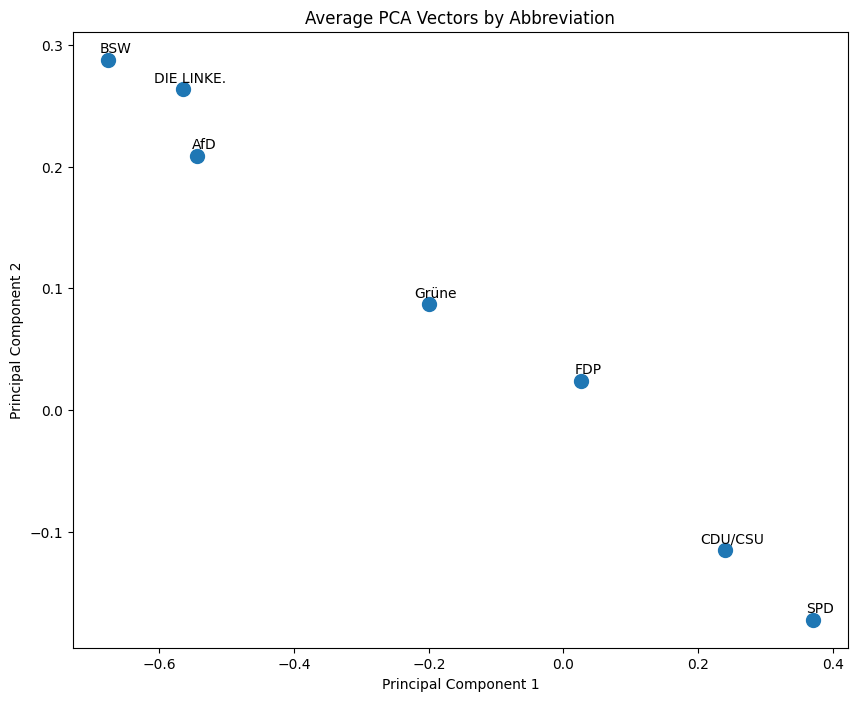

In [246]:
import matplotlib.pyplot as plt

# Drop rows with missing abbreviation values
plot_df = final_df.dropna(subset=["abbreviation"])

# Group by abbreviation and compute the mean of PC1 and PC2 for each group
grouped_means = plot_df.groupby("abbreviation")[["PC1", "PC2"]].mean().reset_index()

# Create a scatter plot of the average vectors
plt.figure(figsize=(10, 8))
plt.scatter(grouped_means["PC1"], grouped_means["PC2"], s=100)

# Annotate each point with the abbreviation label
for _, row in grouped_means.iterrows():
    plt.annotate(row["abbreviation"], (row["PC1"], row["PC2"]),
                 textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Average PCA Vectors by Abbreviation")
plt.show()


In [247]:
temp_df = df.drop(["date", "firstName", "lastName", "speechContent", "com", "pos", "neg"], axis=1)
temp_df = temp_df.groupby("abbreviation").mean() * 100
temp_df * temp_df

,ÖPNV,BW_Afrika,BW_IRINI,CORONA,CORONA_MASSNAHMEN,CORONA_HOMESCHOOLING,CORONA_WARNAPP,CORONA_IMPFSTOFF,NetzDG,IstanbulKonvention,...,UTPRichtlinie,HongkongDemokratiebewegung,Sanierung,Russland,Geldwäsche,Rechtsextremismus,BW_Atalanta,Verbraucherschutz,AtomareSicherheit,NextGenEU
abbreviation,,,,,,,,,,,,,,,,,,,,,
AfD,4.189957,11.646270,11.114172,13.533584,11.924199,7.312801,0.115020,3.389373,2.087731,3.198428,...,1.619106,6.798262,5.512085,2.958774,2.287399,0.679707,18.136394,5.099812,3.666283,6.437293
BSW,3.269349,6.593820,6.864588,42.314763,16.813367,8.305419,0.018262,6.013158,3.839700,6.415965,...,1.738532,4.563522,6.524216,23.368532,4.599982,0.360721,25.020721,17.518220,2.583387,8.536400
CDU/CSU,3.958613,10.475073,9.470426,2.323944,12.069484,7.602422,0.018976,3.351464,1.633958,2.265027,...,1.082607,7.597769,5.710878,1.979554,1.948060,0.556362,15.019547,10.196149,3.551687,8.017379
DIE LINKE.,3.627311,9.446030,8.508442,1.029168,8.831102,6.895028,0.025988,2.729369,1.324598,2.188485,...,0.956039,5.678085,5.096297,1.330742,1.410546,0.449601,13.875987,11.199616,3.563276,6.862249
FDP,3.200773,9.186949,8.353051,4.903523,9.913364,6.487071,0.046140,2.687579,1.471741,1.984820,...,1.051923,7.297392,4.831803,1.589561,1.512212,0.509090,15.486207,6.938697,3.205560,7.574405
Grüne,3.357026,9.671065,8.620615,2.644764,9.866476,6.593836,0.020137,2.728101,1.467831,1.985215,...,1.115175,6.601448,5.074560,2.025637,1.674609,0.595326,12.463947,9.677477,3.387818,7.099791
SPD,3.988454,11.096552,10.021584,4.485882,12.453656,8.302149,0.052426,3.505718,1.802842,2.405259,...,1.043179,7.838547,6.173598,1.898245,1.855774,0.673771,15.539116,11.779498,3.887172,8.309773


In [248]:
None.killTask()

AttributeError: 'NoneType' object has no attribute 'killTask'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reset the index to use 'abbreviation' as a column
temp_df.reset_index(inplace=True)

columns_to_plot = temp_df.columns[1:]

# Loop over each column to create a bar plot
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.bar(temp_df['abbreviation'], temp_df[column])
    plt.xlabel('Party')
    plt.ylabel(column)
    plt.title(f'{column} by Party')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
list(df.loc[(df["date"] < "2019-9-1") & (df["CORONA"] > 0)]["speechContent"])[0]

In [ ]:
columns_to_plot = temp_df.columns[1:]

# Loop over each column to create a bar plot
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df[column].rolling(window=3000).mean())
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title(f'{column} over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()